# Heart Failure Prediction Dataset
kaggle.com/datasets/fedesoriano/heart-failure-prediction

This dataset include different risk factor infromation to use for prediction of heart failure. Let's explore it!

## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Data preparation and EDA

### Load libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("heart.xls")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Attributes


    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Feature types

First of all, we should predict the data from the last column - the presence of the heart disease

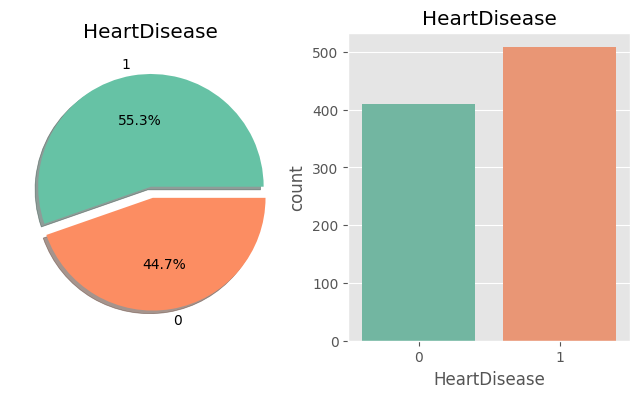

In [ ]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# Piechart for the first subplot
df['HeartDisease'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=sns.color_palette('Set2'))
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')

# Countplot for the second subplot
sns.countplot(df, x='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('HeartDisease')

plt.show()

Nearly equaly distributed heart failure disease trait. How is it connected with other traits?

#### Categorial features

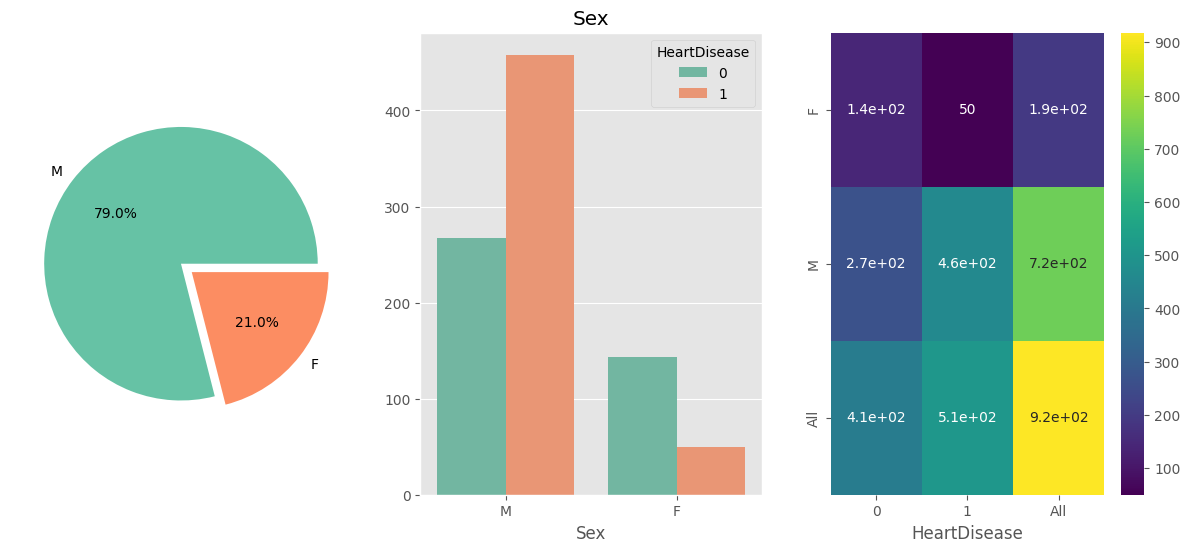

In [ ]:
var="Sex"

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 6))

# first subplot
df[var].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False, colors=sns.color_palette('Set2'))
ax[0].set_ylabel('')

# second subplot
sns.countplot(df, x=var, hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_ylabel('')
ax[1].set_title(var)

# third subplot
crt = pd.crosstab(df[var], df.HeartDisease, margins=True)
sns.heatmap(crt, annot = True, cmap=sns.color_palette("viridis", as_cmap=True))
ax[2].set_ylabel('')

plt.show()

Male have bigger chanses of having heart disease, than females (it is better to check significanty of these differences)

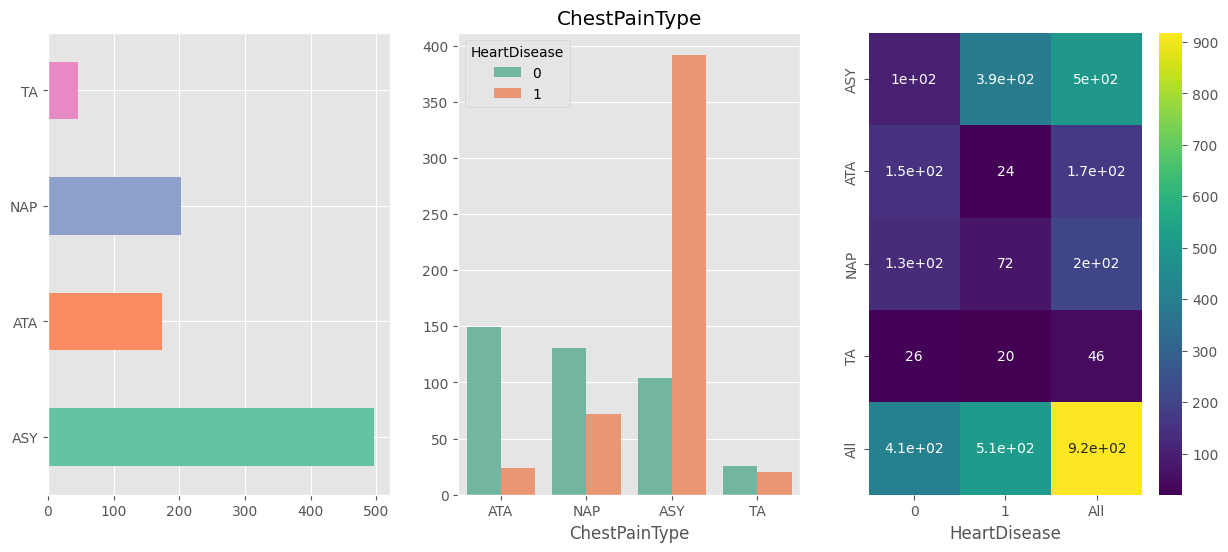

In [ ]:
var="ChestPainType"

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 6))

# first subplot
df.groupby(var).size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'), ax = ax[0])
ax[0].set_ylabel('')

# second subplot
sns.countplot(df, x=var, hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_ylabel('')
ax[1].set_title(var)

# third subplot
crt = pd.crosstab(df[var], df.HeartDisease, margins=True)
sns.heatmap(crt, annot = True, cmap=sns.color_palette("viridis", as_cmap=True))
ax[2].set_ylabel('')

plt.show()

    TA: Typical Angina
    ATA: Atypical Angina
    NAP: Non-Anginal Pain
    ASY: Asymptomatic
    
Asymptomatic pain have a biggest relation to heart fialure

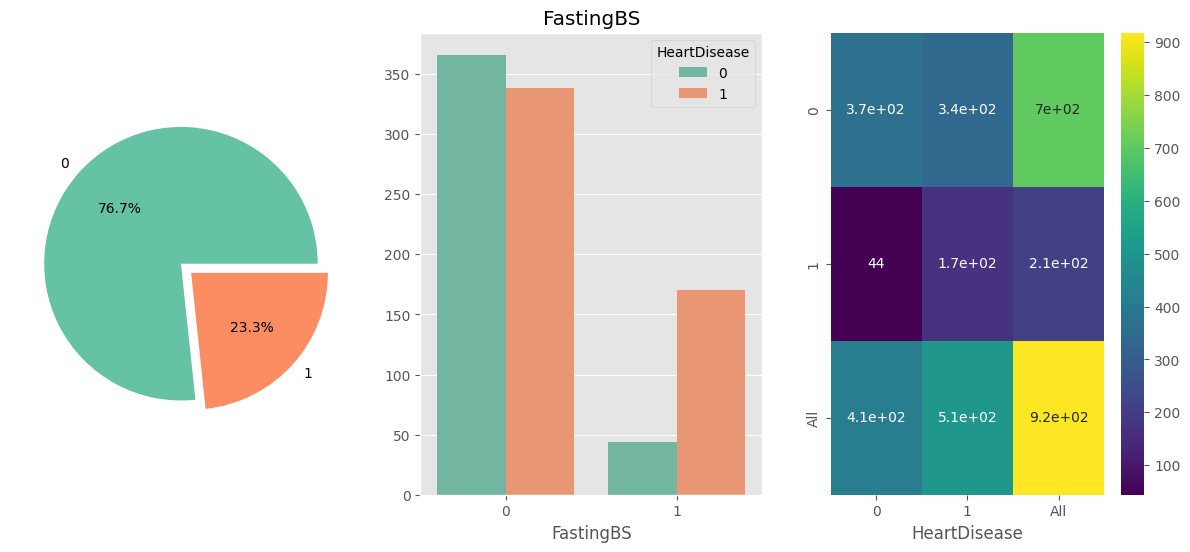

In [ ]:
var="FastingBS"

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 6))

# first subplot
df[var].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False, colors=sns.color_palette('Set2'))
ax[0].set_ylabel('')

# second subplot
sns.countplot(df, x=var, hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_ylabel('')
ax[1].set_title(var)

# third subplot
crt = pd.crosstab(df[var], df.HeartDisease, margins=True)
sns.heatmap(crt, annot = True, cmap=sns.color_palette("viridis", as_cmap=True))
ax[2].set_ylabel('')

plt.show()

In the group is increased number of diseased people with fasting blood sugar and heart disease

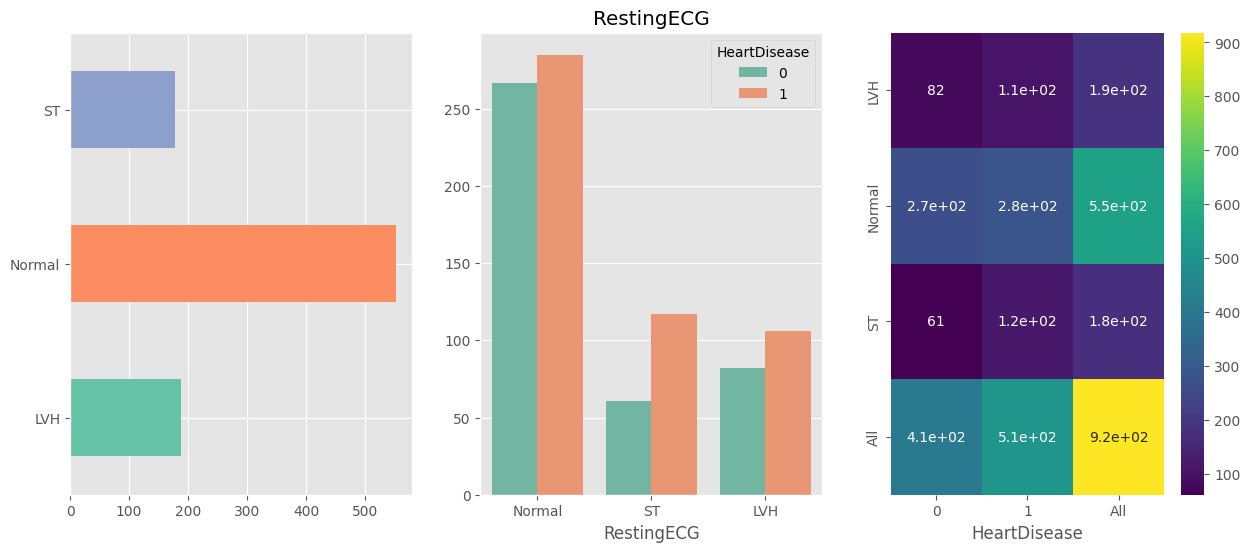

In [ ]:
var="RestingECG"

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 6))

# first subplot
df.groupby(var).size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'), ax = ax[0])
ax[0].set_ylabel('')

# second subplot
sns.countplot(df, x=var, hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_ylabel('')
ax[1].set_title(var)

# third subplot
crt = pd.crosstab(df[var], df.HeartDisease, margins=True)
sns.heatmap(crt, annot = True, cmap=sns.color_palette("viridis", as_cmap=True))
ax[2].set_ylabel('')

plt.show()

All types of resting electrocardiogram results have pretty similar effects, only ST (T-wave abnormality) have a slightly increased relation to the heart failure

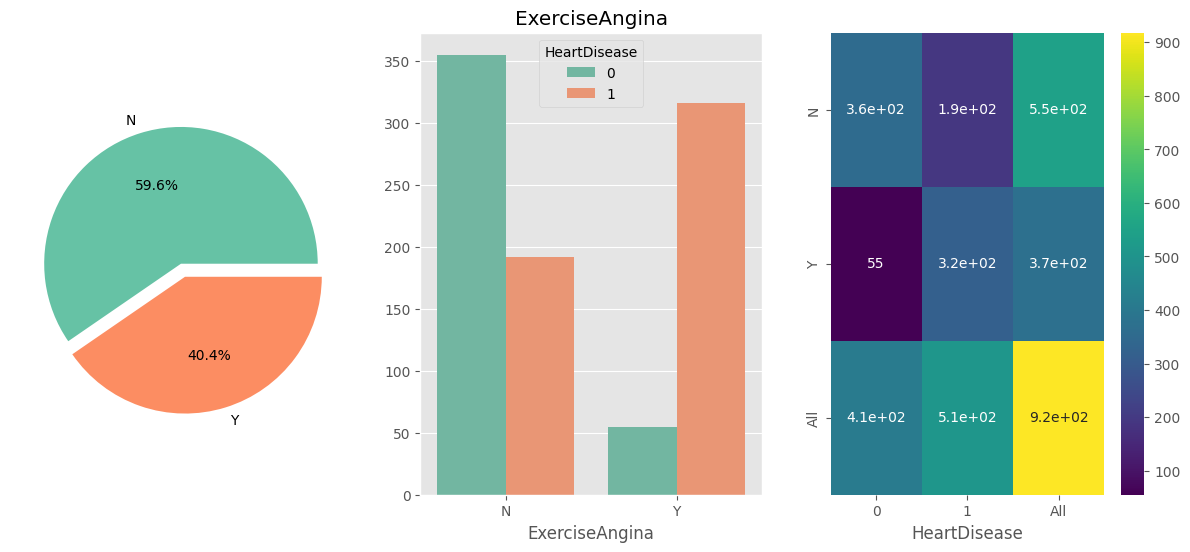

In [ ]:
var="ExerciseAngina"

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 6))

# first subplot
df[var].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False, colors=sns.color_palette('Set2'))
ax[0].set_ylabel('')

# second subplot
sns.countplot(df, x=var, hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_ylabel('')
ax[1].set_title(var)

# third subplot
crt = pd.crosstab(df[var], df.HeartDisease, margins=True)
sns.heatmap(crt, annot = True, cmap=sns.color_palette("viridis", as_cmap=True))
ax[2].set_ylabel('')

plt.show()

Presence of exercise-induced angina highly increase heart failure chances

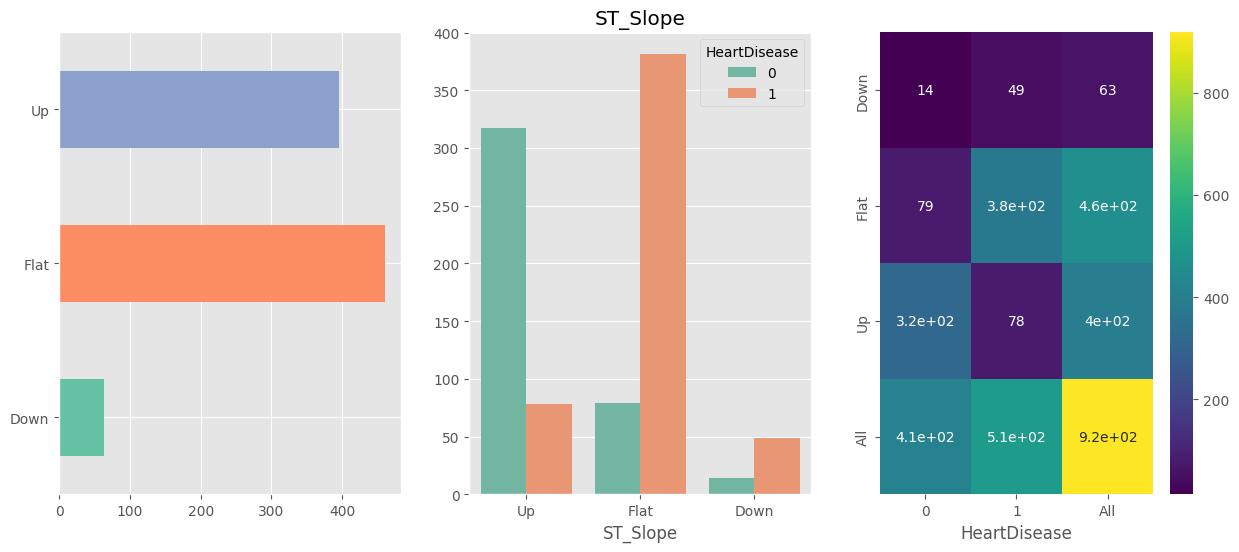

In [ ]:
var="ST_Slope"

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(15, 6))

# first subplot
df.groupby(var).size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'), ax = ax[0])
ax[0].set_ylabel('')

# second subplot
sns.countplot(df, x=var, hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_ylabel('')
ax[1].set_title(var)

# third subplot
crt = pd.crosstab(df[var], df.HeartDisease, margins=True)
sns.heatmap(crt, annot = True, cmap=sns.color_palette("viridis", as_cmap=True))
ax[2].set_ylabel('')

plt.show()

Seems to be the big relationships between the slope of the peak exercise ST segment on electrocardiogramm and heart failure. So, it might be used as a prognostic trait

Flat and down type have increased ratio of people with the heart failure, and up - decreased.

    Up: upsloping
    Flat: flat
    Down: downsloping

#### Continous features

In [ ]:
def relation_violin(var, rel, axis):
  ttl = var + " and " + rel + ', heart disease'
  sns.violinplot(df, x=rel, y=var, hue='HeartDisease', split=True, palette="Set2", ax = ax[axis[0], axis[1]])

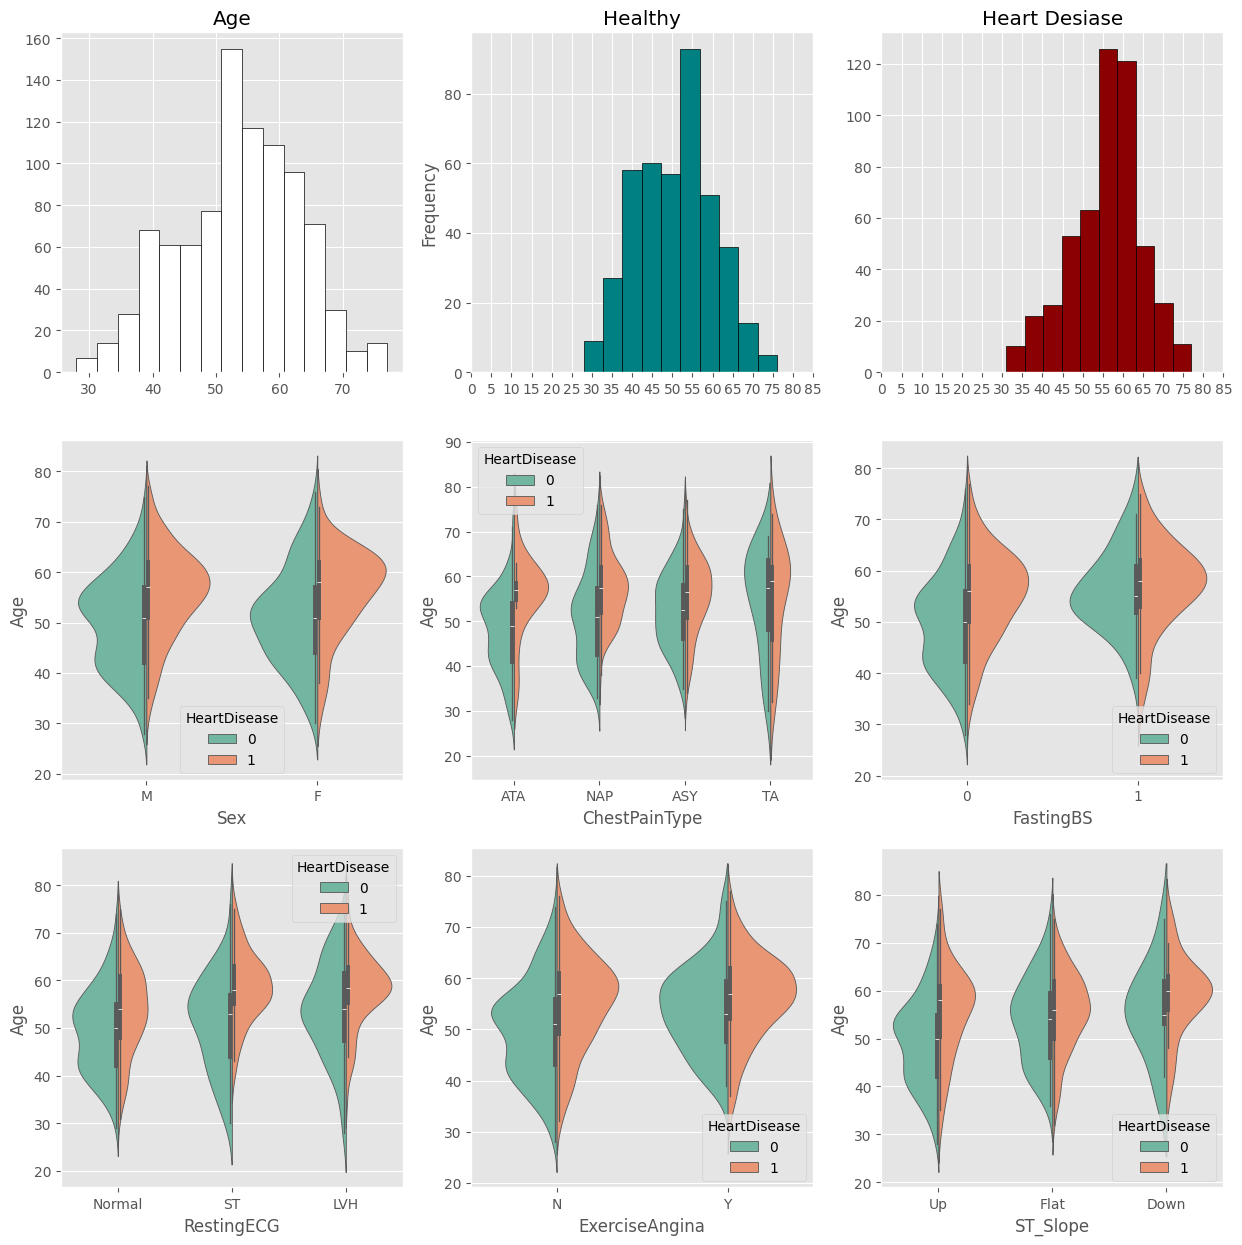

In [ ]:
var="Age"

# Create subplots
f, ax = plt.subplots(3, 3, figsize=(15, 15))

# first subplot
df[var].plot.hist(ax = ax[0,0], bins=15, edgecolor='black', color='white')
ax[0,0].set_ylabel('')
ax[0,0].set_title(var)

# second subplot
df[df['HeartDisease']==0].Age.plot.hist(ax=ax[0,1], bins=10, edgecolor='black', color='teal')
ax[0,1].set_title('Healthy')
x1=list(range(0,90,5))
ax[0,1].set_xticks(x1)

# third subplot
df[df['HeartDisease']==1].Age.plot.hist(ax=ax[0,2], color='darkred', bins=10, edgecolor='black')
ax[0,2].set_title('Heart Desiase')
x2=list(range(0,90,5))
ax[0,2].set_xticks(x2)
ax[0,2].set_ylabel('')

# violins
relation_violin(var, "Sex", [1,0])
relation_violin(var, "ChestPainType", [1,1])
relation_violin(var, "FastingBS", [1,2])
relation_violin(var, "RestingECG", [2,0])
relation_violin(var, "ExerciseAngina", [2,1])
relation_violin(var, "ST_Slope", [2,2])


plt.show()

Age by itself couldn't be used as a predictor, but in connection to gender, fastingBS and other groups it could increase orediction accuracy. For "up" group in encephalogram results, ST by Resting ECG, all excapt of TA chest pain types with no relation to the gender, bigger age is related to increased chance of the heart failure.

Also, just across all dataset, older people have increased risk of heart disease.

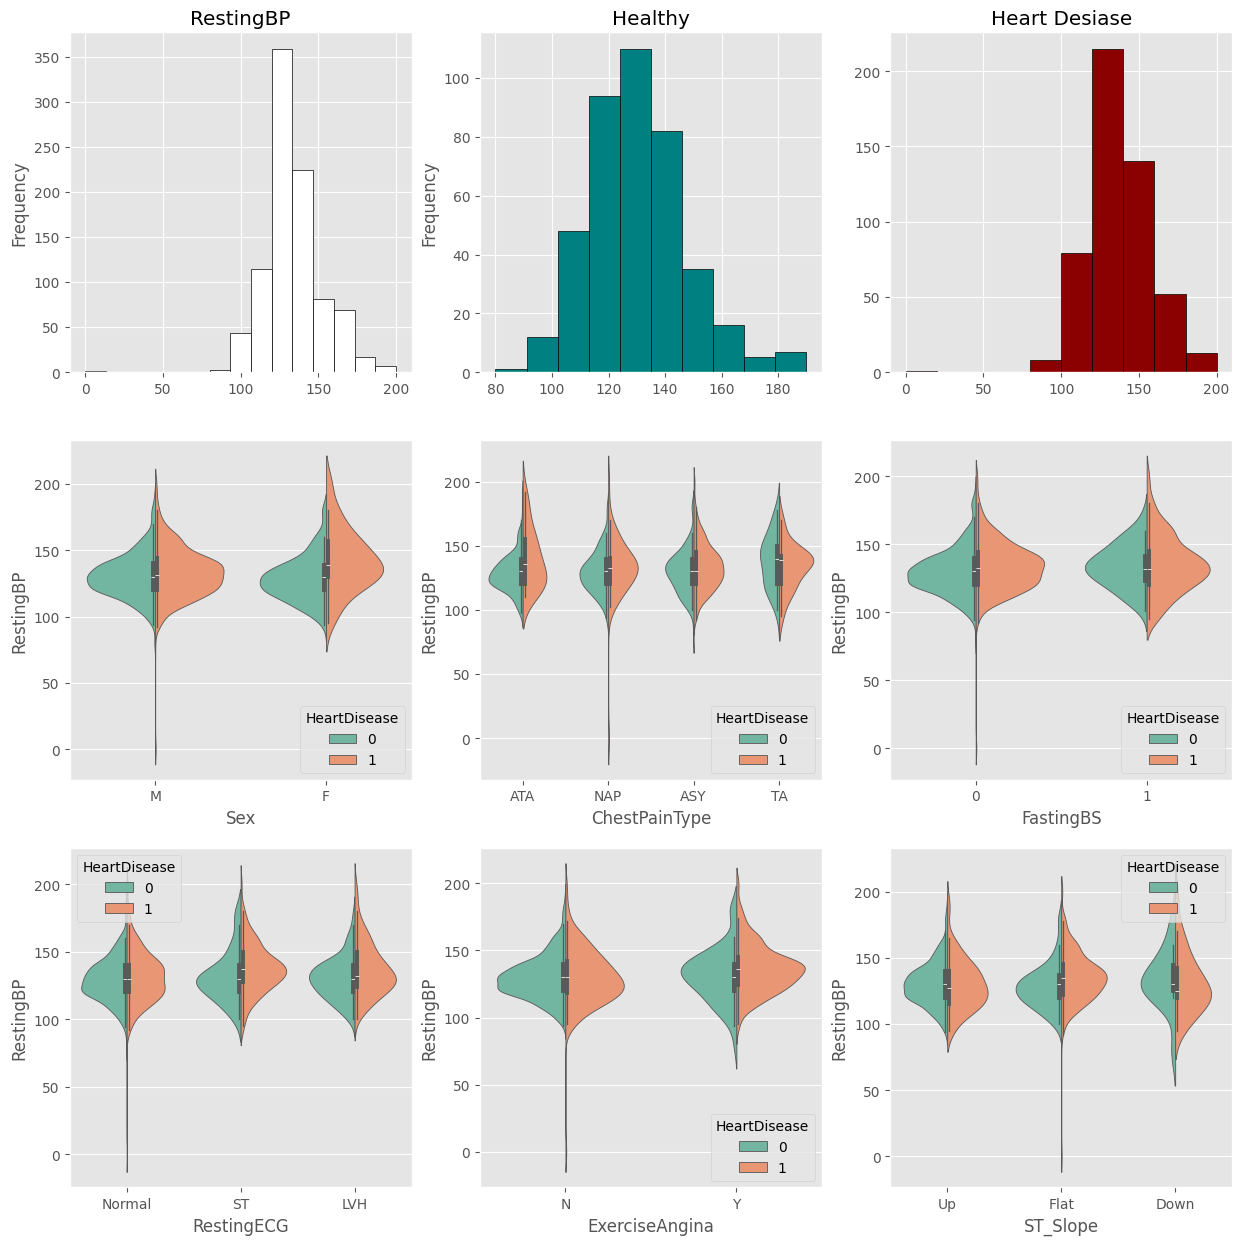

In [ ]:
var="RestingBP"

# Create subplots
f, ax = plt.subplots(3, 3, figsize=(15, 15))

# first subplot
df[var].plot.hist(ax = ax[0,0], bins=15, edgecolor='black', color='white')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title(var)

# second subplot
df[df['HeartDisease']==0][var].plot.hist(ax=ax[0,1], bins=10, edgecolor='black', color='teal')
ax[0,1].set_title('Healthy')
ax[0,2].set_ylabel('')

# third subplot
df[df['HeartDisease']==1][var].plot.hist(ax=ax[0,2], color='darkred', bins=10, edgecolor='black')
ax[0,2].set_title('Heart Desiase')
ax[0,2].set_ylabel('')

# violins
relation_violin(var, "Sex", [1,0])
relation_violin(var, "ChestPainType", [1,1])
relation_violin(var, "FastingBS", [1,2])
relation_violin(var, "RestingECG", [2,0])
relation_violin(var, "ExerciseAngina", [2,1])
relation_violin(var, "ST_Slope", [2,2])


plt.show()

People with disease have much higher resting blood pressure, the value above 150 could be used as a good marker. On the other hand, almost no relation to other factors, only could be seen that diseased females have a slightly bugger restingBP value, as well as other groups about which was written above with relation to heart failure.

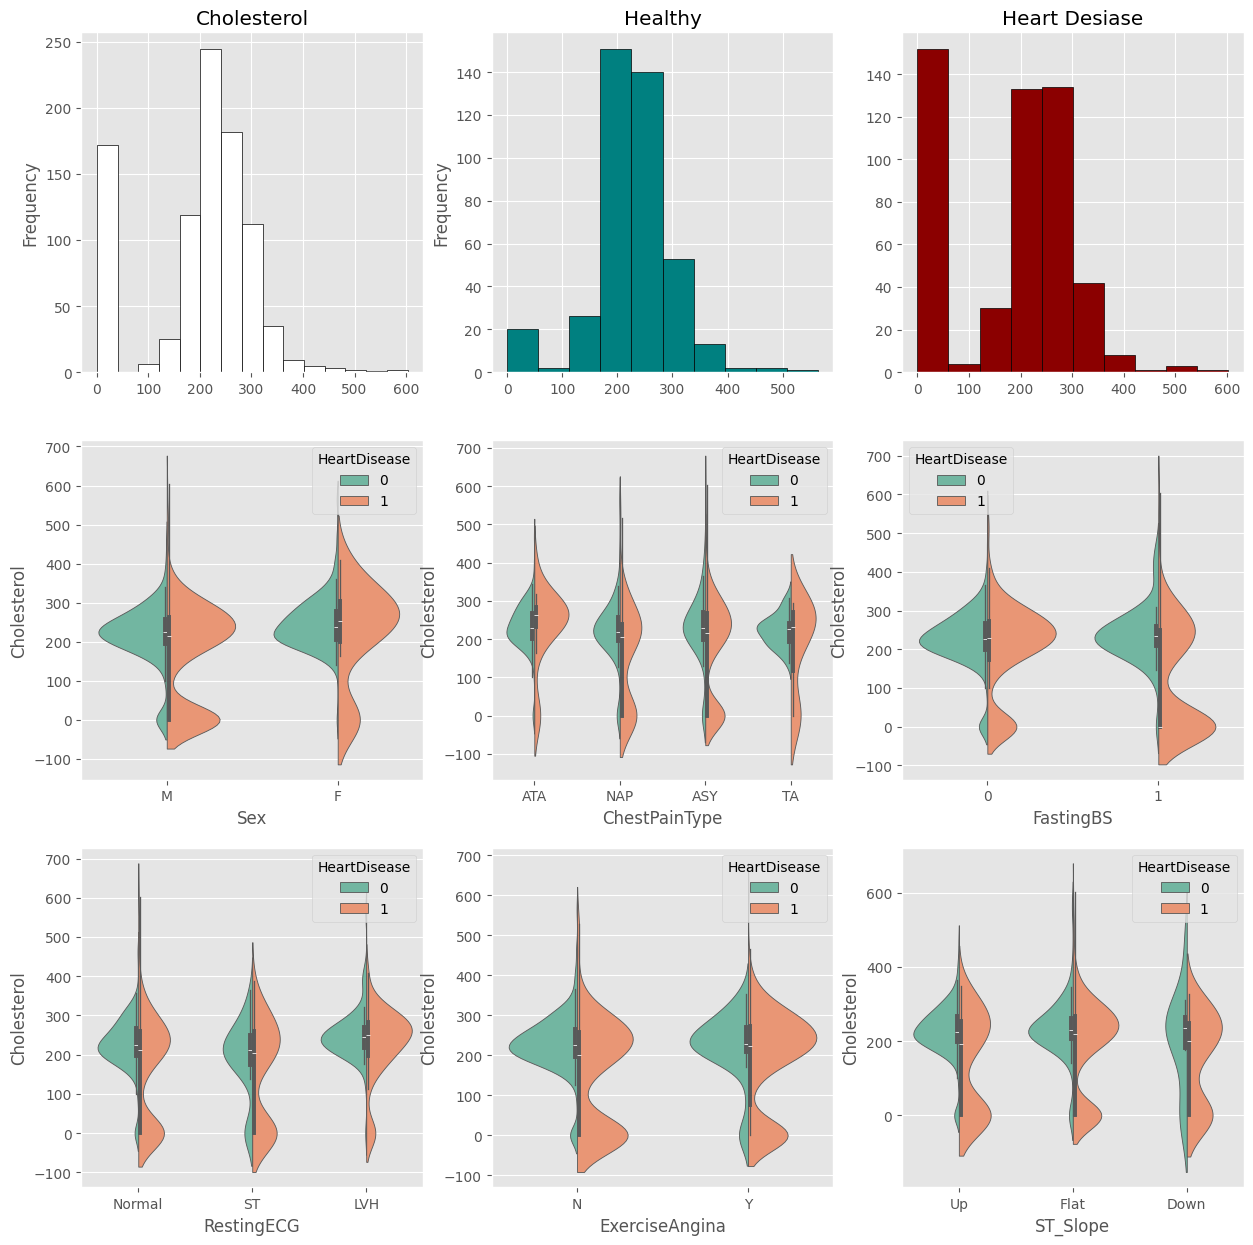

In [ ]:
var="Cholesterol"

# Create subplots
f, ax = plt.subplots(3, 3, figsize=(15, 15))

# first subplot
df[var].plot.hist(ax = ax[0,0], bins=15, edgecolor='black', color='white')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title(var)

# second subplot
df[df['HeartDisease']==0][var].plot.hist(ax=ax[0,1], bins=10, edgecolor='black', color='teal')
ax[0,1].set_title('Healthy')
ax[0,2].set_ylabel('')

# third subplot
df[df['HeartDisease']==1][var].plot.hist(ax=ax[0,2], color='darkred', bins=10, edgecolor='black')
ax[0,2].set_title('Heart Desiase')
ax[0,2].set_ylabel('')

# violins
relation_violin(var, "Sex", [1,0])
relation_violin(var, "ChestPainType", [1,1])
relation_violin(var, "FastingBS", [1,2])
relation_violin(var, "RestingECG", [2,0])
relation_violin(var, "ExerciseAngina", [2,1])
relation_violin(var, "ST_Slope", [2,2])


plt.show()

Very big 0 tail, especially for diseased group

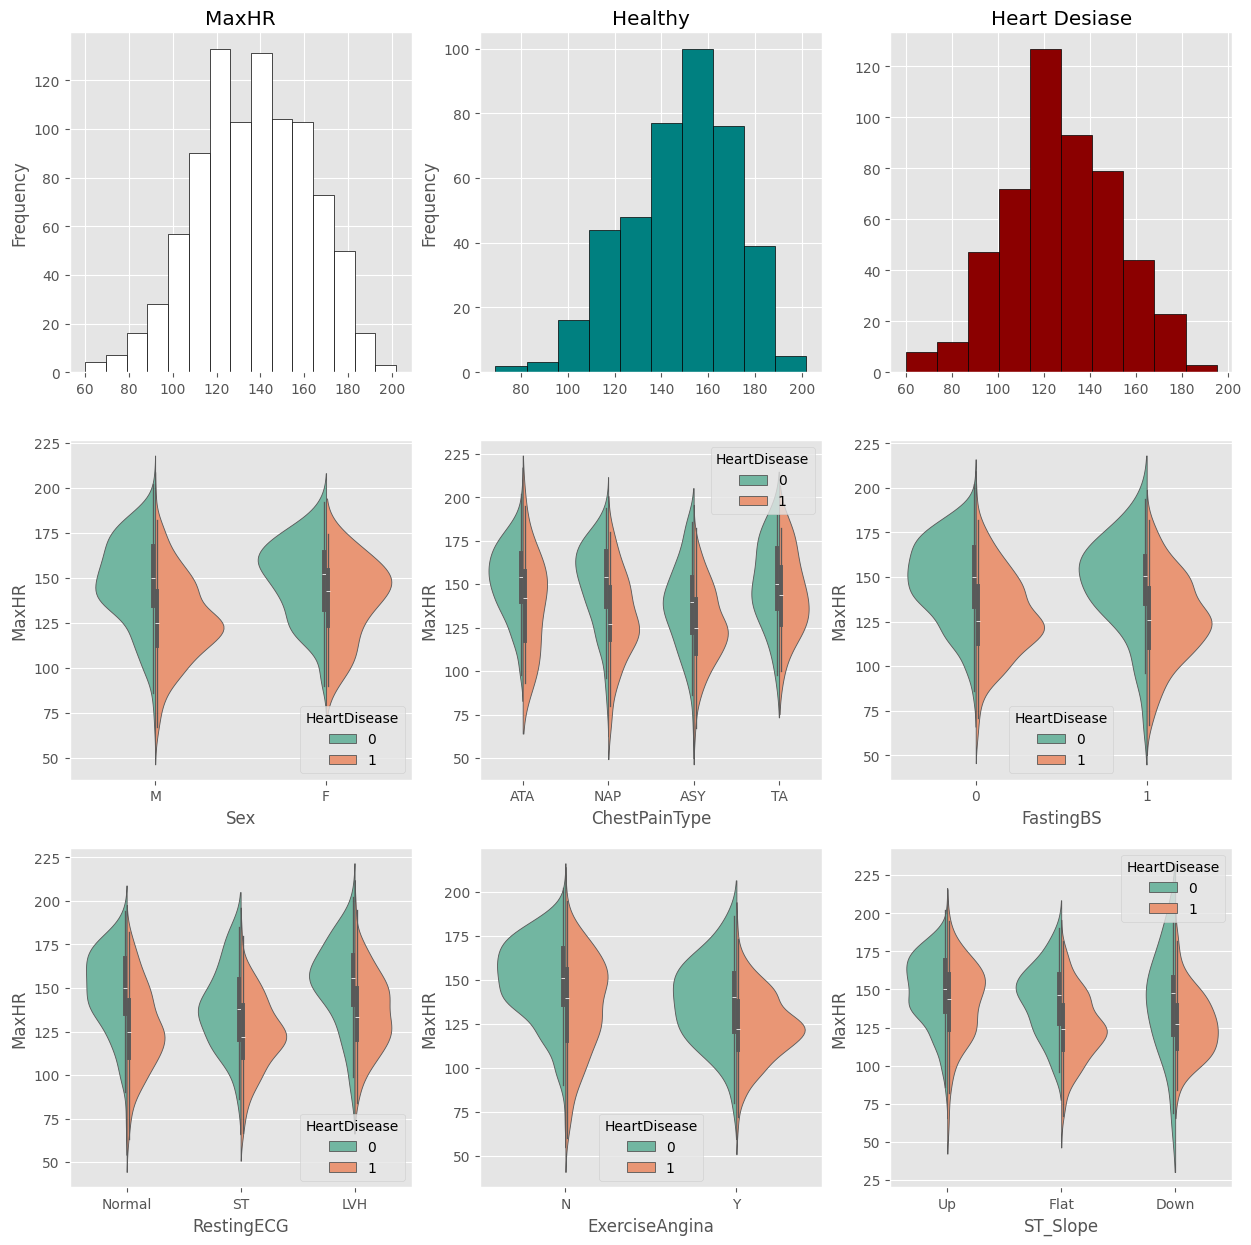

In [ ]:
var="MaxHR"

# Create subplots
f, ax = plt.subplots(3, 3, figsize=(15, 15))

# first subplot
df[var].plot.hist(ax = ax[0,0], bins=15, edgecolor='black', color='white')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title(var)

# second subplot
df[df['HeartDisease']==0][var].plot.hist(ax=ax[0,1], bins=10, edgecolor='black', color='teal')
ax[0,1].set_title('Healthy')
ax[0,2].set_ylabel('')

# third subplot
df[df['HeartDisease']==1][var].plot.hist(ax=ax[0,2], color='darkred', bins=10, edgecolor='black')
ax[0,2].set_title('Heart Desiase')
ax[0,2].set_ylabel('')

# violins
relation_violin(var, "Sex", [1,0])
relation_violin(var, "ChestPainType", [1,1])
relation_violin(var, "FastingBS", [1,2])
relation_violin(var, "RestingECG", [2,0])
relation_violin(var, "ExerciseAngina", [2,1])
relation_violin(var, "ST_Slope", [2,2])


plt.show()

Max heart rate is bigger within healthy people, independently of other traits

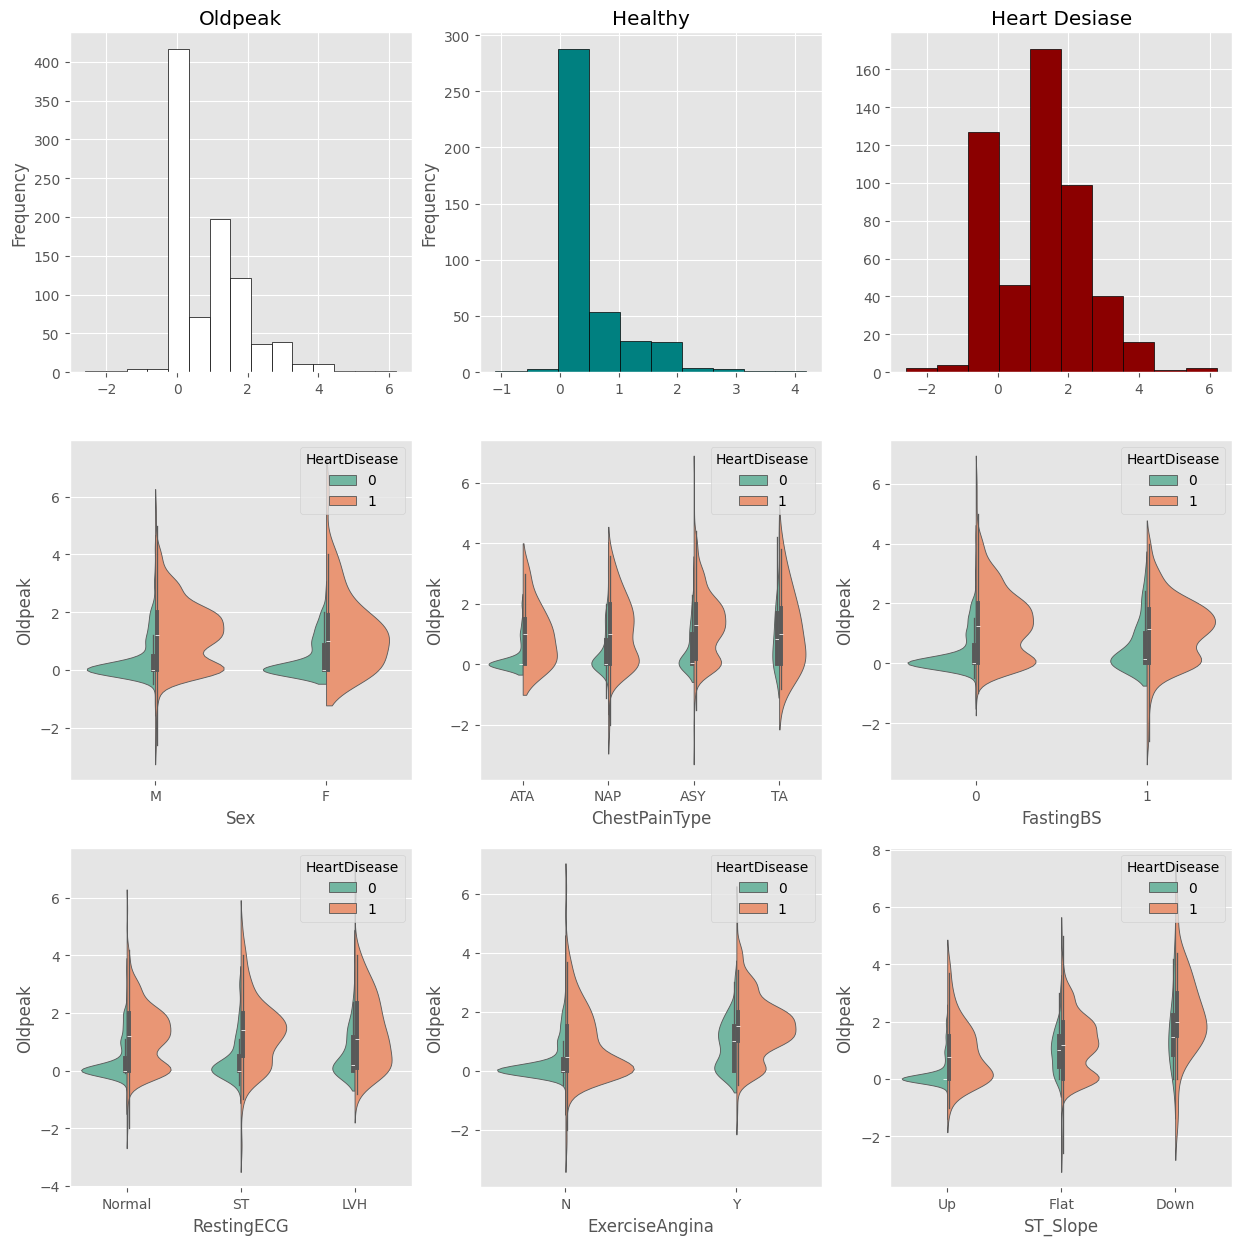

In [ ]:
var="Oldpeak"

# Create subplots
f, ax = plt.subplots(3, 3, figsize=(15, 15))

# first subplot
df[var].plot.hist(ax = ax[0,0], bins=15, edgecolor='black', color='white')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title(var)

# second subplot
df[df['HeartDisease']==0][var].plot.hist(ax=ax[0,1], bins=10, edgecolor='black', color='teal')
ax[0,1].set_title('Healthy')
ax[0,2].set_ylabel('')

# third subplot
df[df['HeartDisease']==1][var].plot.hist(ax=ax[0,2], color='darkred', bins=10, edgecolor='black')
ax[0,2].set_title('Heart Desiase')
ax[0,2].set_ylabel('')

# violins
relation_violin(var, "Sex", [1,0])
relation_violin(var, "ChestPainType", [1,1])
relation_violin(var, "FastingBS", [1,2])
relation_violin(var, "RestingECG", [2,0])
relation_violin(var, "ExerciseAngina", [2,1])
relation_violin(var, "ST_Slope", [2,2])


plt.show()

Oldpeak value is much bigger in diseased group, so ST peak value in depression also could be used as a good prognostic trait

### Relation between traits

[]

<Figure size 800x800 with 0 Axes>

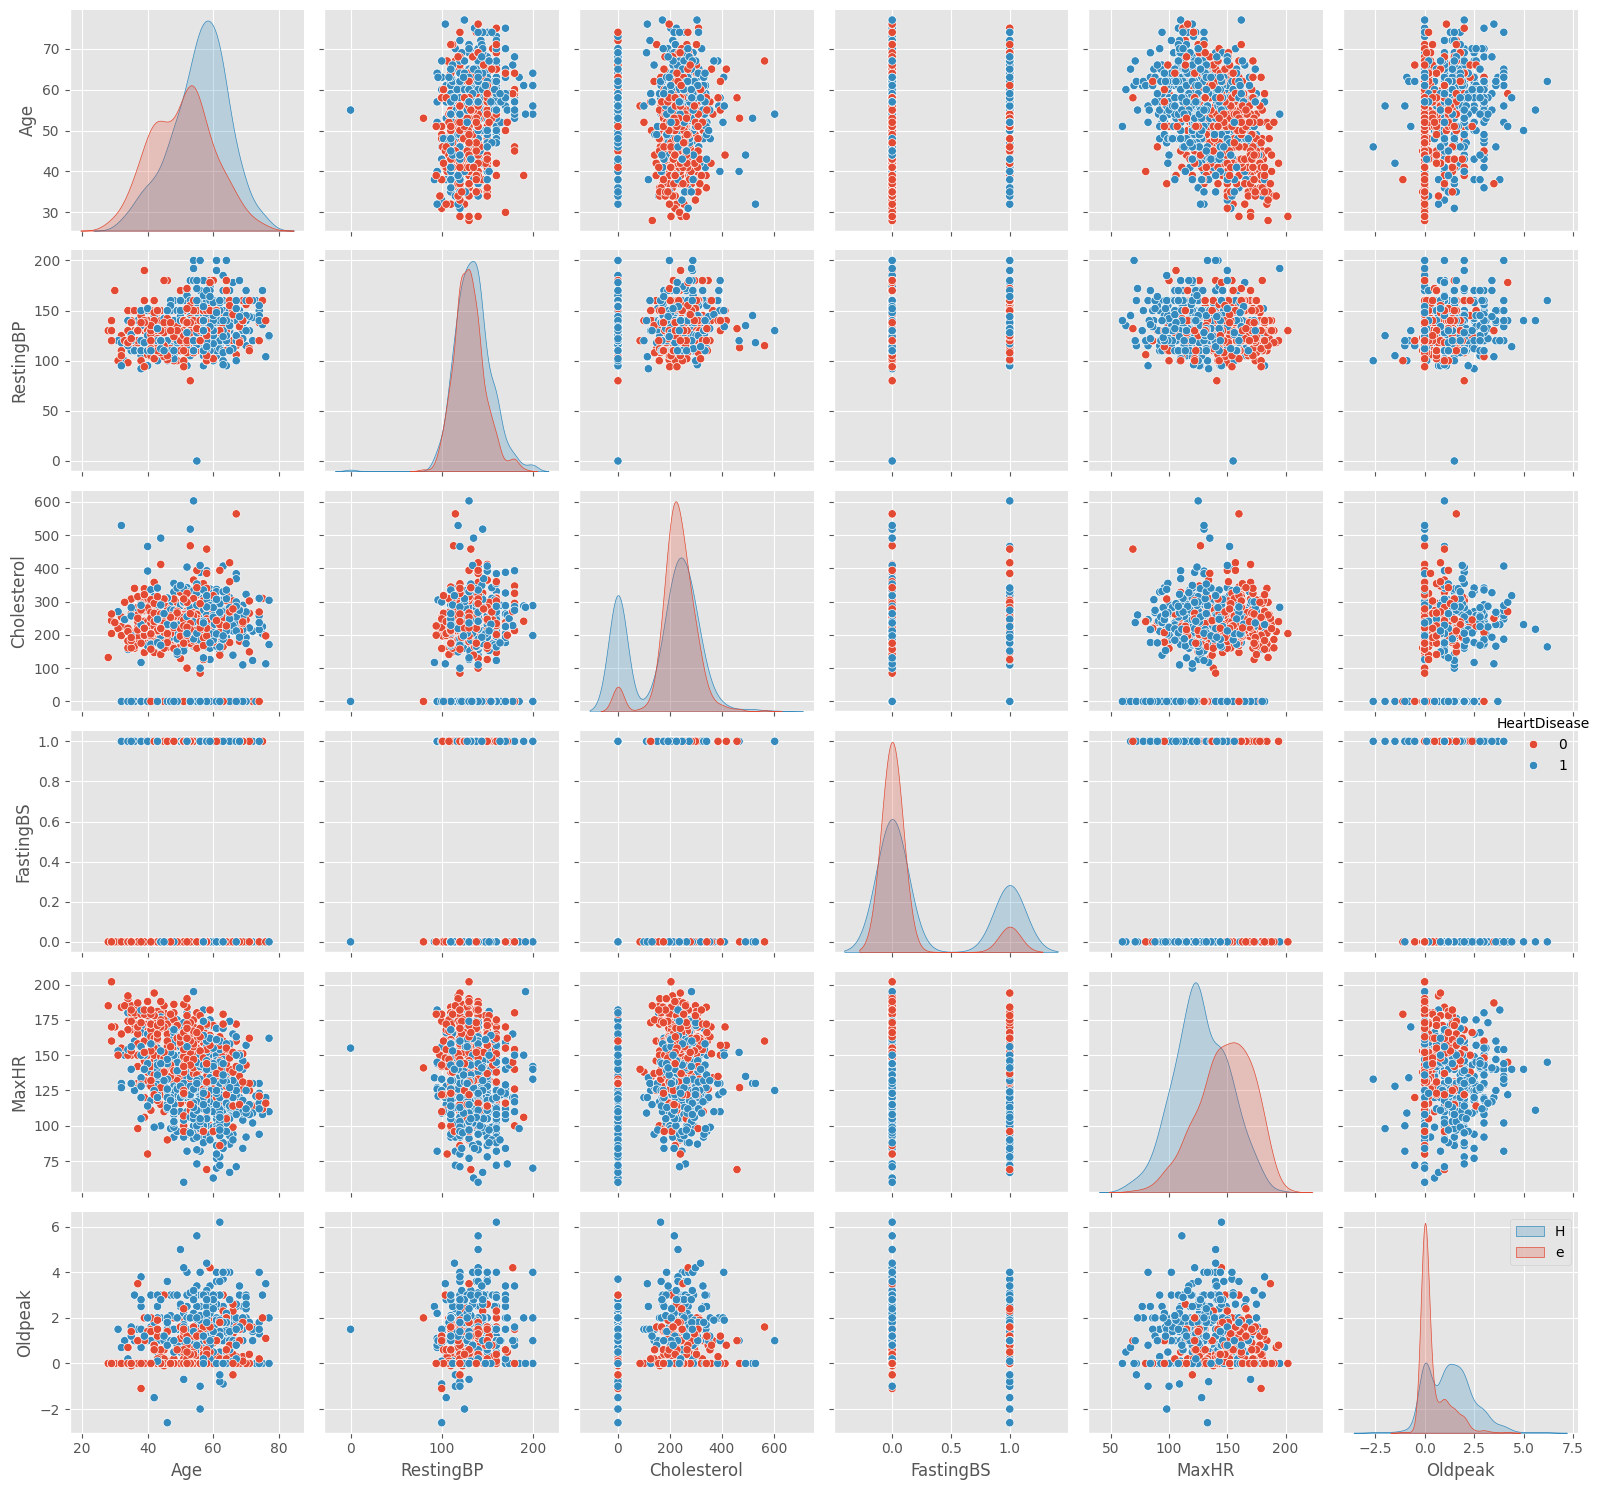

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df,hue="HeartDisease")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We have an outlier in RestingBP with probably missing value(0), and no other visible outliers.

#### Correlations

In [ ]:
string_col = ["Sex", "ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope"]

<Axes: >

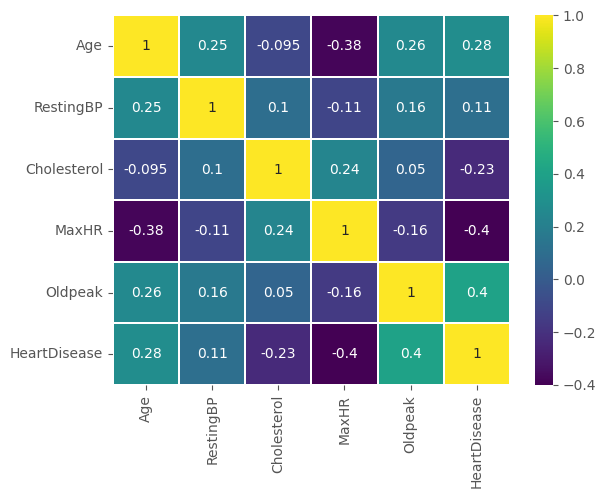

In [ ]:
df_num = df.drop(string_col, axis = 1)
sns.heatmap(df_num.corr(), annot = True, cmap=sns.color_palette("viridis", as_cmap=True),  linewidths=0.2)

OldPeak and Age have a positive correlation to Heart Disease, while MaxHR and Cholesterol - negative. Also, MaxHR is negatively correlated to the age, so MaxHR as a predictor might be related to the age, not to HeartDisease.

## Feature engeneering

I choose to use binning for continous vars, and label/one hot for discrete variables for trees/clusterization models

### Clusterization approach preparation

In [ ]:
df_nontree=df.copy()
cont = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
tmp=[i + "_C" for i in cont]
string_col_1 = [*string_col, *tmp]

# add vars
for i in range(6, 11):
  df_nontree[string_col_1[i]] = 0

#Age
tmp = string_col_1[6]
df_nontree.loc[(df['Age']>=0)&(df['Age']<=45), tmp] = 0
df_nontree.loc[(df['Age']>45)&(df['Age']<=50), tmp] = 1
df_nontree.loc[(df['Age']>50)&(df['Age']<=55), tmp] = 2
df_nontree.loc[(df['Age']>55)&(df['Age']<=60), tmp] = 3
df_nontree.loc[(df['Age']>60)&(df['Age']<=65), tmp] = 4
df_nontree.loc[(df['Age']>65)&(df['Age']<=75), tmp] = 5
df_nontree.loc[(df['Age']>75), tmp] = 6


var = "RestingBP"
tmp = string_col_1[7]
df_nontree.loc[(df[var]>=0)&(df[var]<=50), tmp] = 0
df_nontree.loc[(df[var]>50)&(df[var]<=80), tmp] = 1
df_nontree.loc[(df[var]>80)&(df[var]<=120), tmp] = 2
df_nontree.loc[(df[var]>120)&(df[var]<=150), tmp] = 3
df_nontree.loc[(df[var]>150), tmp] = 4

var = "Cholesterol"
tmp = string_col_1[8]
df_nontree.loc[(df[var]==0), tmp] = 0
df_nontree.loc[(df[var]>0)&(df[var]<=100), tmp] = 1
df_nontree.loc[(df[var]>100)&(df[var]<=150), tmp] = 2
df_nontree.loc[(df[var]>150)&(df[var]<=190), tmp] = 3
df_nontree.loc[(df[var]>190)&(df[var]<=250), tmp] = 4
df_nontree.loc[(df[var]>250)&(df[var]<=350), tmp] = 5
df_nontree.loc[(df[var]>350), tmp] = 6

var = "MaxHR"
tmp = string_col_1[9]
df_nontree.loc[(df[var]>=0)&(df[var]<=100), tmp] = 0
df_nontree.loc[(df[var]>100)&(df[var]<=130), tmp] = 1
df_nontree.loc[(df[var]>130)&(df[var]<=160), tmp] = 2
df_nontree.loc[(df[var]>160)&(df[var]<=180), tmp] = 3
df_nontree.loc[(df[var]>180), tmp] = 4

var = "Oldpeak"
tmp = string_col_1[10]
df_nontree.loc[(df[var]<-1), tmp] = 0
df_nontree.loc[(df[var]>=-1)&(df[var]<=0), tmp] = 1
df_nontree.loc[(df[var]>0)&(df[var]<=1), tmp] = 2
df_nontree.loc[(df[var]>1), tmp] = 3

df_nontree = df_nontree.drop(cont, axis = 1)
df_nontree.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age_C,RestingBP_C,Cholesterol_C,MaxHR_C,Oldpeak_C
0,M,ATA,0,Normal,N,Up,0,0,3,5,3,1
1,F,NAP,0,Normal,N,Flat,1,1,4,3,2,2
2,M,ATA,0,ST,N,Up,0,0,3,5,0,1
3,F,ASY,0,Normal,Y,Flat,1,1,3,4,1,3
4,M,NAP,0,Normal,N,Up,0,2,3,4,1,1


In [ ]:
df_nontree=pd.get_dummies(df_nontree,columns=string_col_1,drop_first=False)

# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,...,MaxHR_C_0,MaxHR_C_1,MaxHR_C_2,MaxHR_C_3,MaxHR_C_4,Oldpeak_C_0,Oldpeak_C_1,Oldpeak_C_2,Oldpeak_C_3,HeartDisease
0,False,True,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,0
1,True,False,False,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,True,False,1
2,False,True,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,0
3,True,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,True,1
4,False,True,False,False,True,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,0


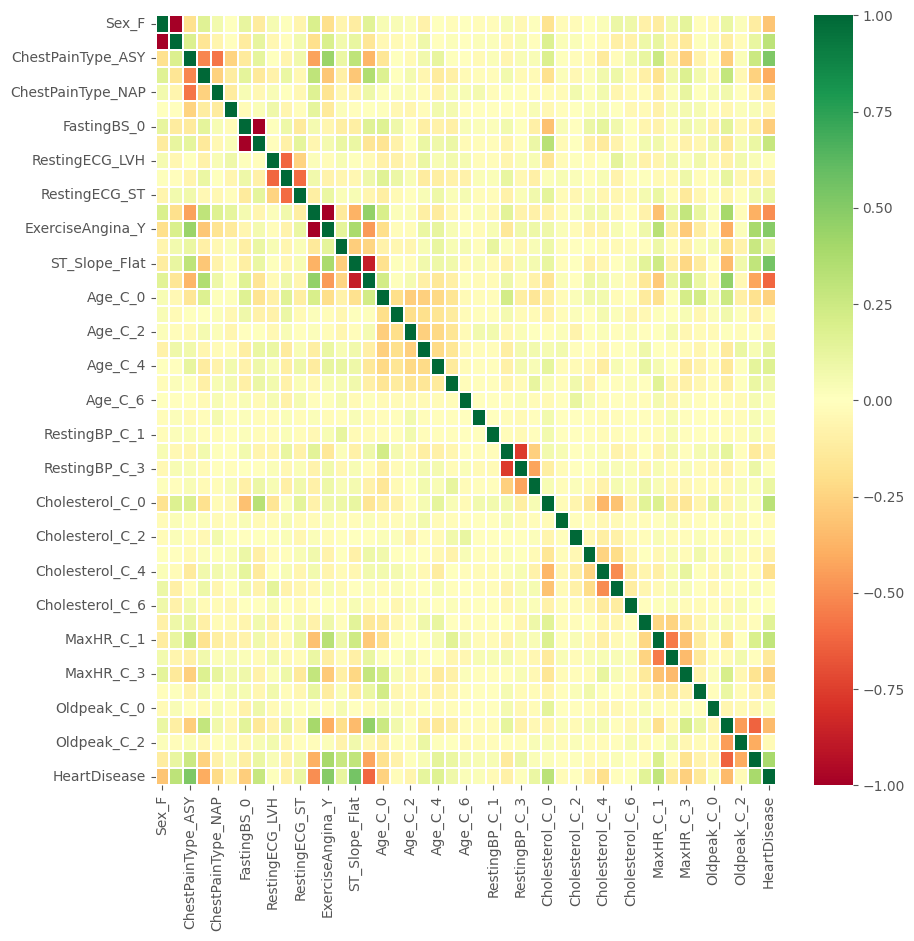

In [221]:
sns.heatmap(df_nontree.corr(),annot=False,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Tree aproach preparation

In [ ]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


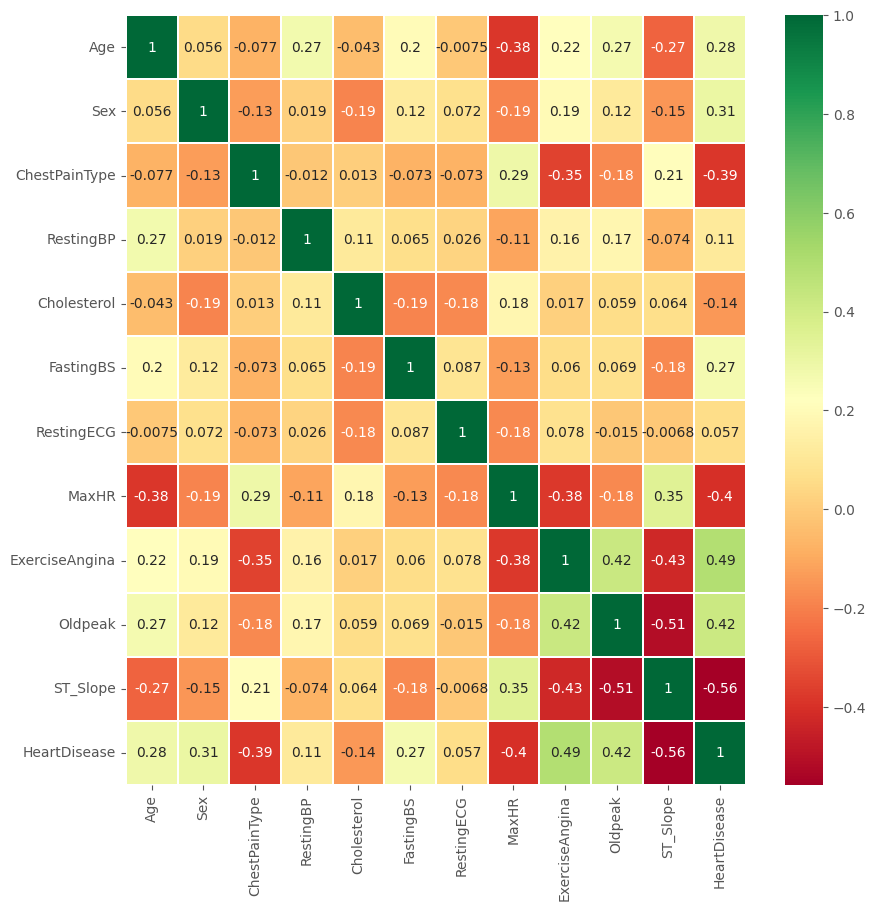

In [ ]:
sns.heatmap(df_tree.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Well, mostly all was described above. The main features in prediction should be ST_slope and MaxHR. Age and sex and ChestPainTYpe are correlated with other features, so their impact on final model might be different.

## A little bit models

from tutorial - https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem

### Logistic regression
As a baseline

In [ ]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)


    clfLR=LogisticRegression()
    clfLR.fit(X_train,y_train)
    y_pred=clfLR.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.93      0.81      0.87       102

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for Fold 1 : 0.8702773792443808
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        82
           1       0.90      0.82      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8568866571018651
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                       

The accuracy on the Fold 5 is dropped dramatically, but overall biggest f1 is 0.88, recall 0.89 and precision 0.87, which is good.

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clfGNB=GaussianNB()
    clfGNB.fit(X_train,y_train)
    y_pred=clfGNB.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        82
           1       0.88      0.41      0.56       102

    accuracy                           0.64       184
   macro avg       0.72      0.67      0.63       184
weighted avg       0.73      0.64      0.62       184

The accuracy for 1 : 0.6692969870875178
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

The accuracy for 2 : 0.8851028216164515
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.83      0.61      0.70        82
           1       0.74      0.90      0.81       102

    accuracy                           0.77  

Overall, work worser there, because probably standartization approach could be better for it

### Decision tree

In [ ]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clfDTC=DecisionTreeClassifier(criterion="entropy")
    clfDTC.fit(X_train,y_train)
    y_pred=clfDTC.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        82
           1       0.84      0.64      0.73       102

    accuracy                           0.73       184
   macro avg       0.75      0.75      0.73       184
weighted avg       0.76      0.73      0.73       184

The accuracy for 1 : 0.745456719273075
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        82
           1       0.88      0.64      0.74       102

    accuracy                           0.75       184
   macro avg       0.77      0.76      0.75       184
weighted avg       0.78      0.75      0.75       184

The accuracy for 2 : 0.7637494021999043
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        82
           1       0.75      0.90      0.82       102

    accuracy                           0.78   

Suprisingly, even worser.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clfRFC=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clfRFC.fit(X_train,y_train)
    y_pred=clfRFC.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.91      0.84      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

The accuracy for 1 : 0.8727881396461025
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        82
           1       0.91      0.75      0.82       102

    accuracy                           0.82       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.82      0.82       184

The accuracy for 2 : 0.8286704925872789
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

The best precision and recall so far.

## Feature importance

<Figure size 1000x500 with 0 Axes>

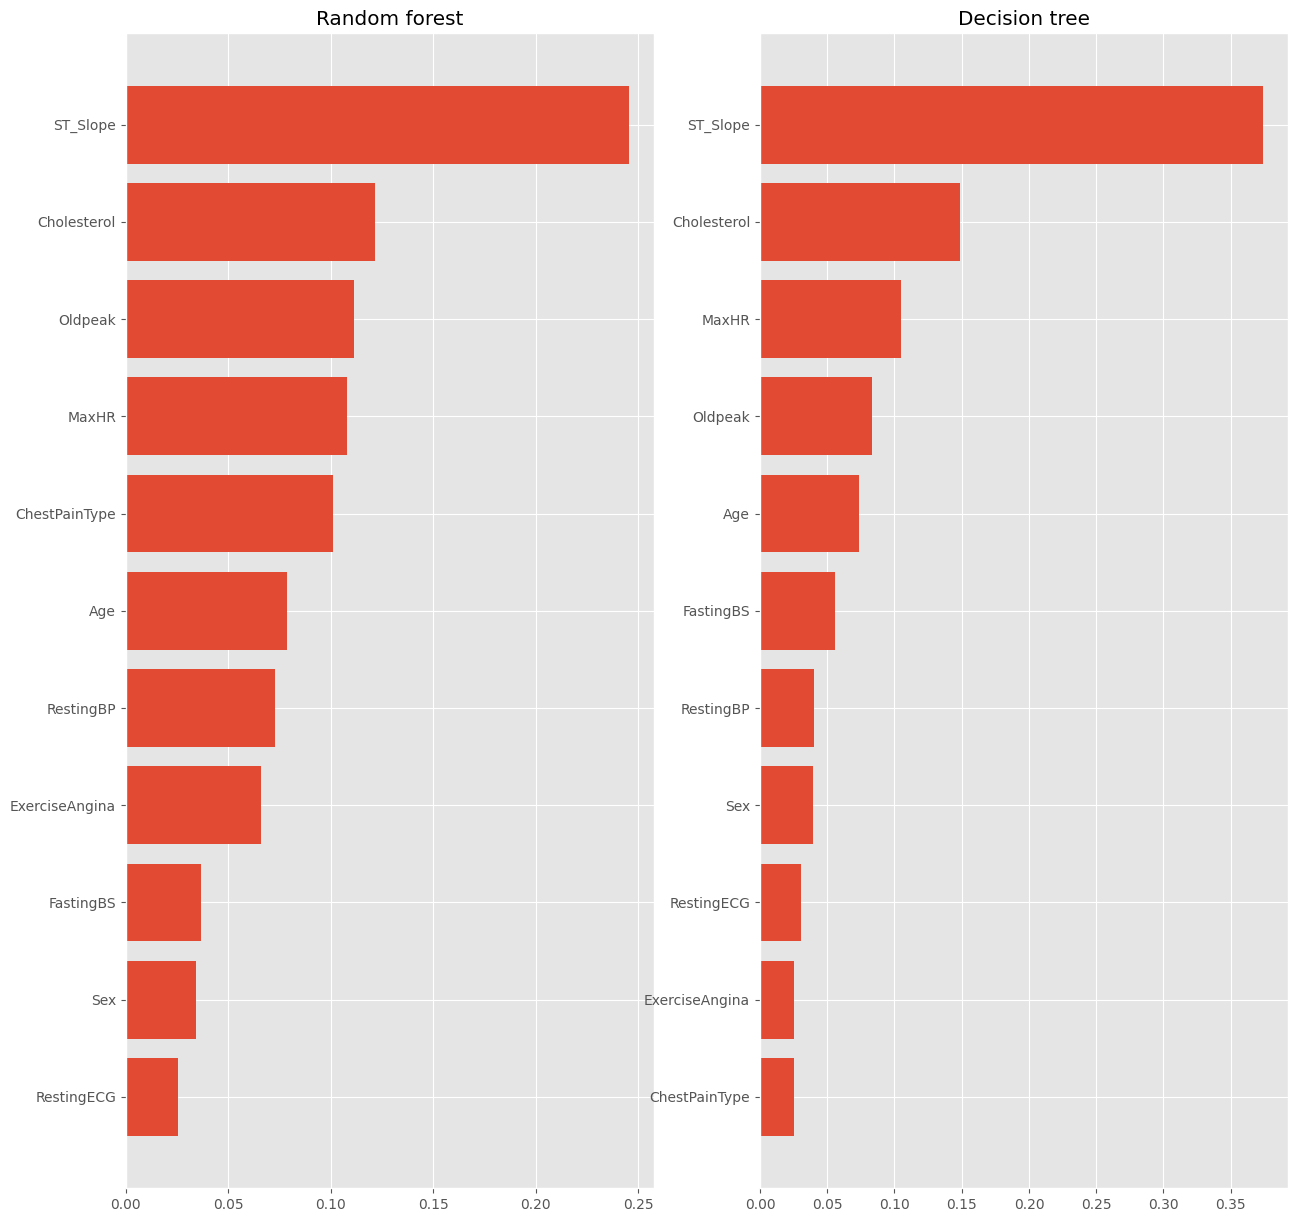

In [ ]:
plt.figure(figsize=(10,5))
f, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].set_title("Random forest")
importance = clfRFC.feature_importances_
idxs = np.argsort(importance)
ax[0].barh(range(len(idxs)),importance[idxs],align="center")
ax[0].set_yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])

ax[1].set_title("Decision tree")
importance = clfDTC.feature_importances_
idxs = np.argsort(importance)
ax[1].barh(range(len(idxs)),importance[idxs],align="center")
ax[1].set_yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])


plt.show()

Pretty similar results for feature importance. The most important feature is ST slope. Suprisngly, MaxHR is a better predictor than age. Also we see in EDA, that males have a bigger risk of heart failure, but sex is a low importance feature. So, it might be related to some other features - excersize angina and oldpeak.

## Conclusions

The most important factors for predict using ML are ST_slope, Cholesterol, oldpeak and MaxHR. It is a little suprising that age and gender, which were one of the most important features during EDA is not so important in the end, but it might be related to correlation of this features with other ones, or to the bad training practice by myself(